# Part 02
## Introduction to Python and ODE Solver
A web-based, interactive computing tool for capturing the whole computation process: developing, documenting, and executing code, as well as communicating the results.
- Ctrl-Enter: run cell in-place
- Shift-Enter: run cell
- Alt-Enter: run cell, insert below

Indentation matters!

Capitalization is important!

In [1]:
# Here I am printing
print(5)
print(1+1)

5
2


## Variables
When declaring a variable, capitalization is important!

In [2]:
variable = 2.3
Five = 5
message = "This is a string"
print (variable)
print (Five + Five)
print(variable,message,Five)

2.3
10
2.3 This is a string 5


In [3]:
print("Message:", message)
print("{0} is an int and {1} is a float".format(Five,variable))
print("{1} is a float and {0} is an int".format(Five,variable))

Message: This is a string
5 is an int and 2.3 is a float
2.3 is a float and 5 is an int


In [4]:
print("hello" + "world")
print("number" * 5)

helloworld
numbernumbernumbernumbernumber


In [5]:
print("some" + 1)

TypeError: can only concatenate str (not "int") to str

In [6]:
print (type(Five))

<class 'int'>


In [7]:
print (type(variable))

<class 'float'>


In [8]:
year="2020"
print(int(year)+1)

2021


## Arithmetic Operations

Addition +

Subtraction -

Division /

Multiplication *

Modulo % (returns the remainder of a division)

Floor division //

The power of **

In [9]:
print(5%2)
print(5/2)
print(5//2)
print(2**3)

1
2.5
2
8


## if/else/elif

- Equals: a == b
- Not Equals: a != b
- Less than: a < b
- Less than or equal to: a <= b
- Greater than: a > b
- Greater than or equal to: a >= b

- Not Equals AND a greater than 0: a!= and a>0
- Not Equals OR a greater than 0: a!= or a>0

Indentation matters!

In [10]:
a=2
b=5
if a>b:
    print("a is bigger than b")
elif a<b:
    print("a is smaller than b")
else:
    print("a is equal to b")

a is smaller than b


In [11]:
if a>b:
    print("a is bigger than b")
elif a<b:
    print("a is smaller than b")
    if a>0:
        print("a is positive")
else:
    print("a is equal to b")

a is smaller than b
a is positive


## Exercise
- store an integer number in a variable.
- determine if the number is even or odd.

Tip: if, else, %

## Loops
Indentation is IMPORTANT!

In [ ]:
for x in range(0,3):
    print("x = %d" % x)

In [ ]:
for x in range(0,3):
    for y in range(0,3):
        print("(x,y) = (%d,%d)" % (x,y))

# Exercise
Using a for loop, for $1\leq x\leq 5$ and $1\leq y\leq 5$, print when $x*y$ is even

Tip: for, range(), if, %

## Lists

In [ ]:
mylist = ["first", "second", 3]
print(mylist[0], mylist[2])
print(mylist)
print(type(mylist))
print(type(mylist[0]))
print(type(mylist[2]))

In [ ]:
mylist[1]=2.0
mylist.append("LNCC")
for item in mylist:
    print(item)

## Tuple
A tuple is a collection which is ordered and unchangeable

In [ ]:
mytuple = ("apple", "banana", 3)
for item in mytuple:
    print(item)

In [ ]:
mytuple[1]=3

## User defined functions
User-defined functions are reusable code blocks; they only need to be written once, then they can be used multiple times.

In [ ]:
def addNumbers(n1,n2,n3):
    result = n1+n2+n3
    return result

In [ ]:
total=addNumbers(2,4,5)
print(total)

# Exercise
Write a user defined function that accepts x and y and returns:
\begin{equation}
(x+y)^2
\end{equation}
Test your function!

Tip: def, **, return, print()

## Anonymous Functions

In [12]:
x = lambda a: a*10
print(x(10))

100


In [13]:
def myfunc(x):
    return lambda a: a*x

In [14]:
y=myfunc(10)
print(y(5))

50


In [15]:
z=myfunc(100)
print(z(5))

500


## Defining the model
Let N be the number of tumor cells and assume that this number can increase with a growth rate of $r$ 1/hour until it reaches the environmental carrying capacity of $K$ cells. With these assumptions, the mathematical model is:
\begin{equation}
\frac{dN}{dt}=rN\left(1-\frac{N}{K}\right),
\end{equation}

- $r$: tumor growth rate;
- $K$: environmental carrying capacity;
- $\boldsymbol{p}=(r,K)$.

In [16]:
# Let y be the vector of outputs, t the time, and p the vector of parameters
def control_tumor(y, t, p):
    tumor = p[0] * y[0] * (1.0 - y[0] / p[1])
    return tumor

In [28]:
# Importing libraries
import numpy as np
from scipy.integrate import odeint
# Define time interval, parameter value, and initial condition
times = np.arange(0,50,0.5)
r = 0.25
K = 60
ic = 1
# Solving the ODE model
sol = odeint(control_tumor, t=times, y0=ic, args=tuple([[r,K]]))

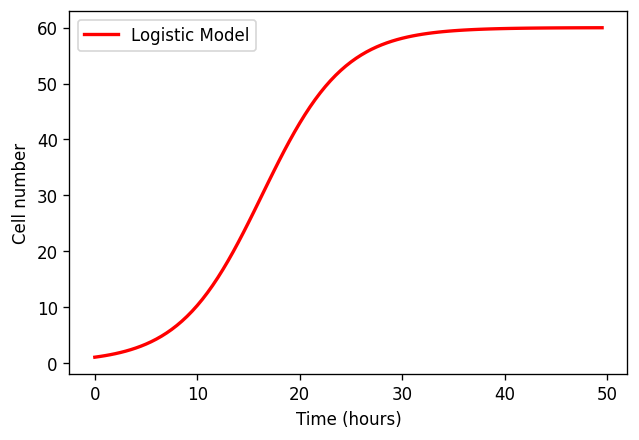

In [24]:
# Plotting the solution
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=120)
plt.plot(times, sol, label='Logistic Model', color='red',linewidth=2.0)
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Cell number');
#plt.savefig("just_data.pdf")
plt.show()

## Adding drug
Let C be the drug concentration (ng/mL) and assume that: it is being constantly delivered at a rate $a$, it naturally decays at a rate $b$, and it is consumed by the tumor by a rate $g$. The number of cells will decrease proportionally to the drug concentration at a rate $f$. With these assumptions, the mathematical model is:
\begin{align}
\frac{dN}{dt}&=rN\left(1-\frac{N}{K}\right)-fNC,\\
\frac{dC}{dt}&=a-bC-gNC.
\end{align}

- $r$: tumor growth rate;
- $K$: environmental carrying capacity;
- $f$: tumor death rate due to the drug;
- $a$: drug delivery;
- $b$: drug natural decay;
- $g$: drug consumption rate;
- $\boldsymbol{p}=(r,K,f,a,b,g)$.

In [19]:
#p = (r,K,f,a,b,g)
def treated_tumor(y, t, p):
    tumor=p[0] * y[0] * (1.0 - y[0] / p[1])-p[2]*y[0]*y[1]
    drug=p[3]-p[4]*y[1]-p[5]*y[0]*y[1]
    return [tumor,drug]

In [20]:
# Define time interval, parameter value, and initial condition
times = np.arange(0,50,0.5)
r = 0.25
K = 60
f = 0.1
a = 1.0
b = 0.1
g = 0.2
tumor_ic = 1
drug_ic = 0
# Solving the ODE model
y = odeint(treated_tumor, t=times, y0=[tumor_ic,drug_ic], args=tuple([[r,K,f,a,b,g]]))
sol = odeint(control_tumor, t=times, y0=tumor_ic, args=tuple([[r,K]]))

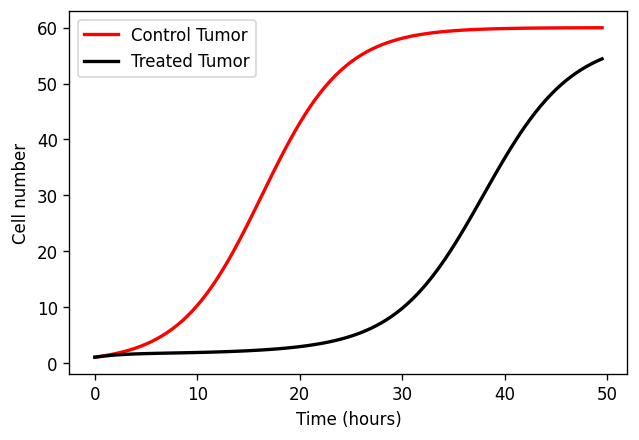

In [21]:
# Plotting the tumor solution
fig, ax = plt.subplots(dpi=120)
plt.plot(times, sol, label='Control Tumor', color='red',linewidth=2.0)
plt.plot(times, y[:,0], label='Treated Tumor', color='black',linewidth=2.0)
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Cell number');
#plt.savefig("just_data.pdf")
plt.show()

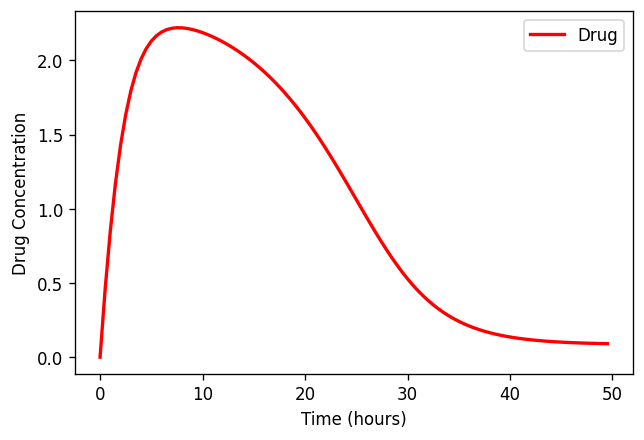

In [22]:
# Plotting the drug solution
fig, ax = plt.subplots(dpi=120)
plt.plot(times, y[:,1], label='Drug', color='red',linewidth=2.0)
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Drug Concentration');
#plt.savefig("just_data.pdf")
plt.show()

# Exercise
Let C be the drug concentration (ng/mL) and assume that: it is being constantly delivered at a rate $a$, it naturally decays at a rate $b$, and it is consumed by the tumor by a rate $g$. Let $D$ be the tumor cells that lost the hability to proliferate due to the drug at a rate $f$. With these assumptions, the mathematical model is:
\begin{align}
\frac{dN}{dt}&=rN\left(1-\frac{N+D}{K}\right)-fNC,\\
\frac{dC}{dt}&=a-bC-gNC-gDC,\\
\frac{dD}{dt}&=fNC.
\end{align}

- $r$: tumor growth rate;
- $K$: environmental carrying capacity;
- $f$: proliferation inhibition due to the drug;
- $a$: drug delivery;
- $b$: drug natural decay;
- $g$: drug consumption rate;
- $\boldsymbol{p}=(r,K,f,a,b,g)$.